This Notebook will plot some histograms for data gathered from Mastodon instances.

Firstly, we load all the data that was previously gathered from all Mastodon instances. If your file path differs, you need to change it down below.

In [1]:
filepath='/mnt/ceph/storage/data-in-progress/data-teaching/theses/wstud-thesis-ernst/instance-data/mastodon'

In [2]:
from fediverse_analysis.instance_data import analyze

try:
    with open(filepath, 'r') as file:
        an = analyze.Analyzer(file)
except Exception as e:
    print(e)
    exit(1)
data = an.df

Total number of instances: 22052
Removed for (partially) no data: 12424
Removed for invalid data: 2
Remaining: 9626


Now every statistic is plotted as a histogram.

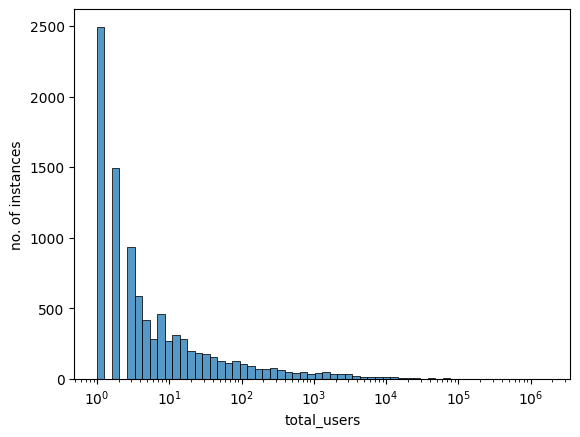

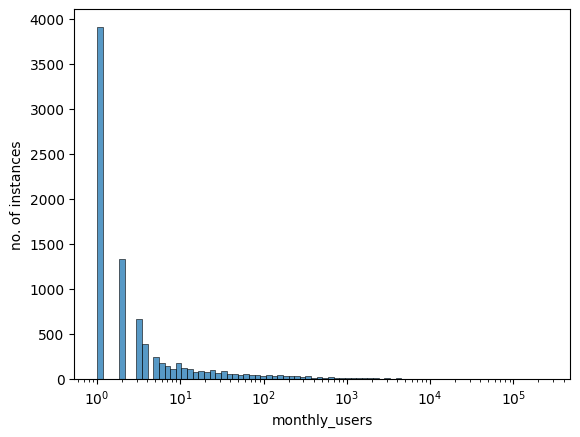

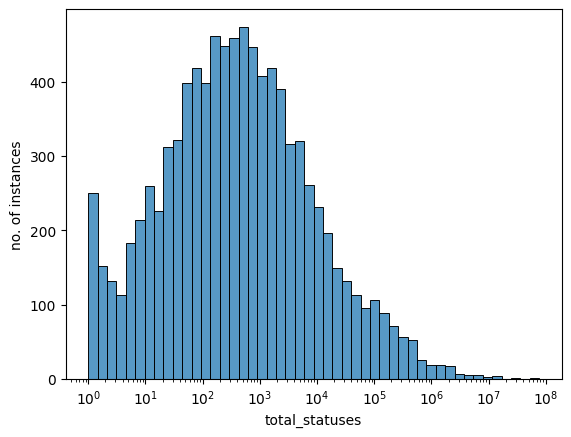

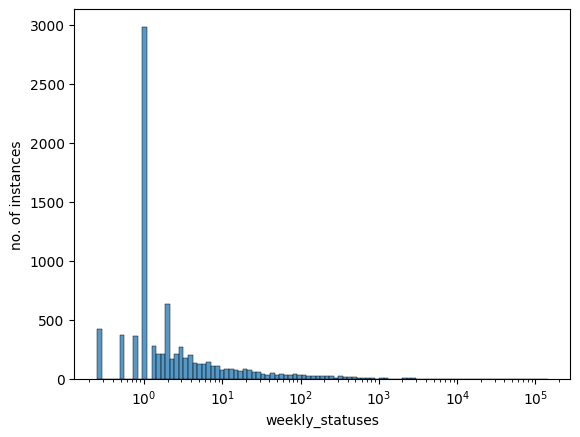

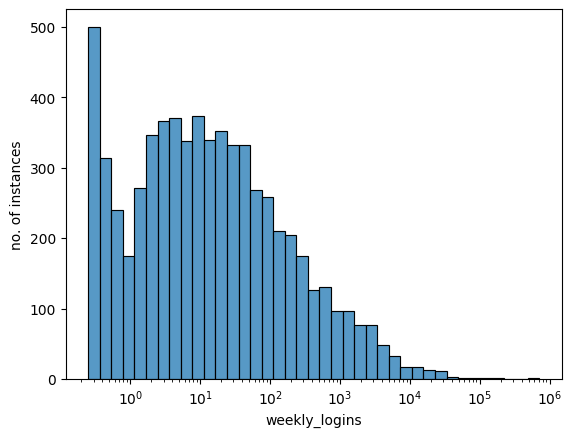

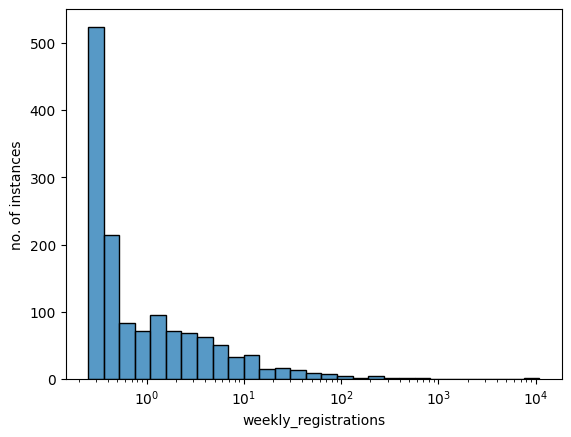

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# PU stands for per user
available_stats = [an.TOTAL_USERS, an.MONTHLY_USERS, an.TOTAL_STATUSES,
                   an.WEEKLY_STATUSES, an.WEEKLY_LOGINS, an.WEEKLY_REGS]

for i in range(len(available_stats)):
    plt.figure(i)
    plot = sns.histplot(data=data[available_stats[i]], log_scale=True)
    plot.set(xlabel=available_stats[i])
    plot.set(ylabel='no. of instances')

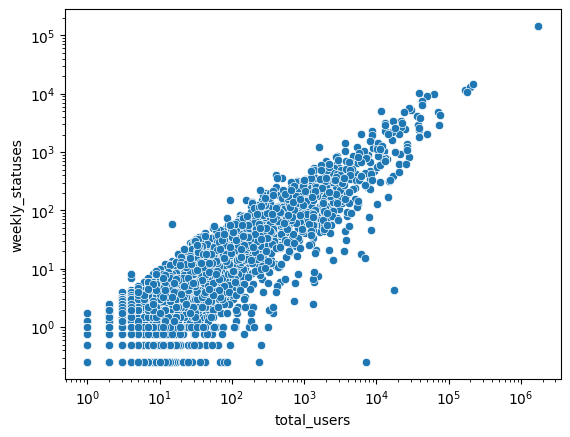

In [4]:
plot = sns.scatterplot(data=data, x=an.TOTAL_USERS, y=an.WEEKLY_STATUSES)
plt.xscale('log')
plt.yscale('log')